In [2]:
import pandas as pd

file_name = 'data/NSDUH_2023_Tab.txt'
df = pd.read_csv(file_name, sep="\t", dtype=str)
# print(df.head())
# print(df['AGE3'].value_counts())

In [29]:
substance_ever = ['CIGEVER', 'MJEVER', 'ALCEVER', 'BLNTEVER', 'COCEVER', 'CRKEVER', 'HEREVER', 'LSD', 'AMYLNIT']
df['MJEVER'].value_counts(dropna=False)
# 1 = Yes ................................................................................................................................ 25497 44.96
# 2 = No ................................................................................................................................. 31154 54.94
# 4 = No LOGICALLY ASSIGNED
# 11 = Yes (see note) 
# 85 = BAD DATA Logically assigned
# 91 = NEVER USED COCAINE (COCEVER=2) FOR CRKEVER
# 94 = DON'T KNOW ........................................................................................................... 32 0.06
# 97 = REFUSED .
# 98 = BLANK (NO ANSWER)

MJEVER
2     31154
1     25497
94       32
97       22
Name: count, dtype: int64

In [14]:
# df[['UD5ILLANY','IRPYUD5ALC']].value_counts(dropna=False)
df['UD5ILLANY'].value_counts(dropna=False)
# IRPYUD5ALC -- mild/moderate/severe alcohol use disorder
# IRPYUD5MRJ -- mild/moderate/severe marijuana use disorder
# 

UD5ILLANY
0    50125
1     6580
Name: count, dtype: int64

In [11]:
df['SMIPY'].value_counts(dropna=False)
# SMIPY -- Serious mental illness
# AMIPY -- Any mental illness
# LMIPY -- Less than serious mental illness
df['AMIPY'].value_counts(dropna=False)

AMIPY
0      32479
1      12654
NaN    11572
Name: count, dtype: int64

  UD5ILLANY AMIPY     ANALWT2_C            Drug Use Disorder  \
0         0     0   3276.469874    No (No Drug Use Disorder)   
1         0     1  15630.082955    No (No Drug Use Disorder)   
2         1     1   4018.172390  Yes (Has Drug Use Disorder)   
4         0     0   8195.104779    No (No Drug Use Disorder)   
5         0     0   3770.725769    No (No Drug Use Disorder)   

             Any Mental Illness  
0    No (No Any Mental Illness)  
1  Yes (Has Any Mental Illness)  
2  Yes (Has Any Mental Illness)  
4    No (No Any Mental Illness)  
5    No (No Any Mental Illness)  


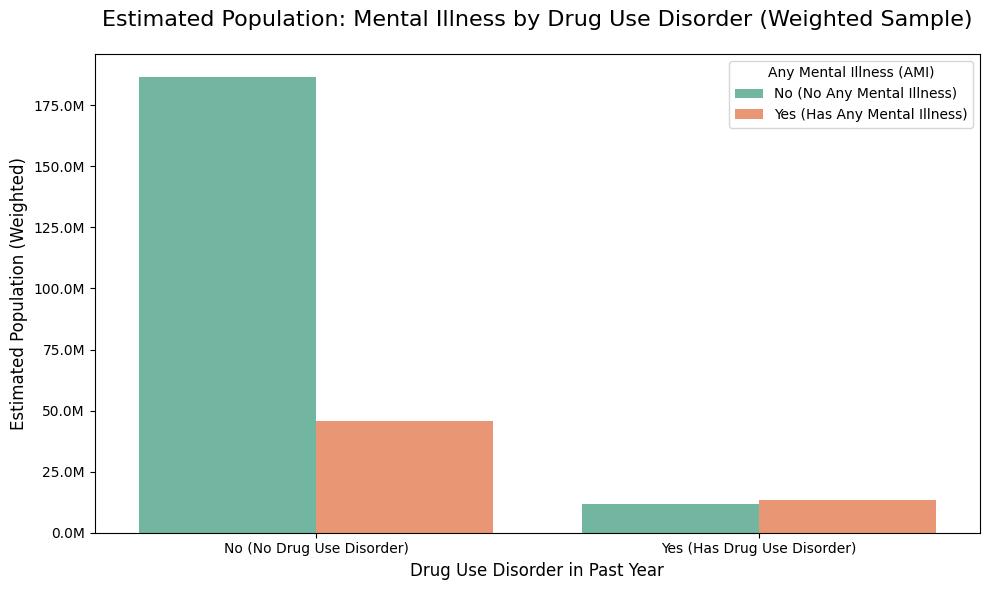

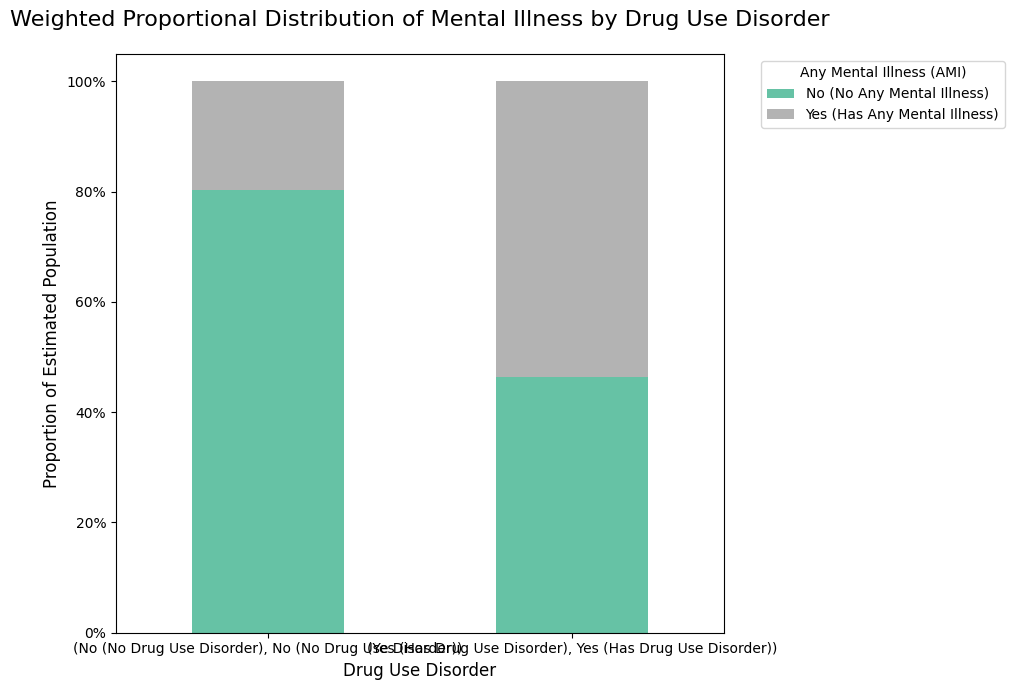

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- 1. Data Preprocessing ---
cols_of_interest = ['UD5ILLANY', 'AMIPY', 'ANALWT2_C']
plot_df = df[cols_of_interest].copy()
plot_df['ANALWT2_C'] = pd.to_numeric(plot_df['ANALWT2_C'], errors='coerce')
plot_df = plot_df.dropna(
    subset=['UD5ILLANY', 'AMIPY', 'ANALWT2_C']
)

plot_df['Drug Use Disorder'] = plot_df['UD5ILLANY'].map({
    '1': 'Yes (Has Drug Use Disorder)',
    '0': 'No (No Drug Use Disorder)'
})

plot_df['Any Mental Illness'] = plot_df['AMIPY'].map({
    '1': 'Yes (Has Any Mental Illness)',
    '0': 'No (No Any Mental Illness)'
})

plot_df = plot_df.dropna(
    subset=['Drug Use Disorder', 'Any Mental Illness']
)

# print(plot_df.head())


# --- PLOT 1: Grouped Bar Chart (Weighted Population) ---
weighted_counts = plot_df.groupby(
    ['Drug Use Disorder', 'Any Mental Illness']
)['ANALWT2_C'].sum().reset_index()

weighted_counts = weighted_counts.rename(
    columns={'ANALWT2_C': 'Estimated Population'}
)

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(
    data=weighted_counts,
    x='Drug Use Disorder',
    y='Estimated Population',
    hue='Any Mental Illness',
    palette='Set2'
)

ax1.set_title(
    'Estimated Population: Mental Illness by Drug Use Disorder (Weighted Sample)',
    fontsize=16,
    pad=20
)
ax1.set_xlabel('Drug Use Disorder in Past Year', fontsize=12)
ax1.set_ylabel('Estimated Population (Weighted)', fontsize=12)

ax1.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M')
)

plt.legend(title='Any Mental Illness (AMI)')
plt.tight_layout()
plt.savefig('figure/AMI_UD_0_weighted.png')


# --- PLOT 2: 100% Stacked Bar Chart (Weighted Proportions) ---
g = plot_df.groupby(
    ['Drug Use Disorder', 'Any Mental Illness']
)['ANALWT2_C'].sum()

props_weighted = g.groupby(level=0).apply(lambda x: x / x.sum())
props_weighted = props_weighted.unstack()
ax2 = props_weighted.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    colormap='Set2',
    rot=0
)

ax2.set_title(
    'Weighted Proportional Distribution of Mental Illness by Drug Use Disorder',
    fontsize=16,
    pad=20
)
ax2.set_xlabel('Drug Use Disorder', fontsize=12)
ax2.set_ylabel('Proportion of Estimated Population', fontsize=12) # Changed label
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax2.legend(title='Any Mental Illness (AMI)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('figure/AMI_UD_1_weighted.png')

In [27]:
df[df['AMIPY'].isna()]['AGE3'].value_counts()

AGE3
2    4067
3    3856
1    3649
Name: count, dtype: int64

In [28]:
df['AGE3'].value_counts()

AGE3
9     12355
8      5287
5      5214
11     5060
10     4960
4      4728
2      4067
7      3884
3      3856
1      3649
6      3645
Name: count, dtype: int64